In [1]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
from collections import deque
import json
import os
from datetime import datetime

In [2]:
video_path ='input2/people-detection.mp4'

In [3]:
model = YOLO("yolov5s.pt")

frame_skip = 3
alert_threshold = 3
alert_window = 5
alert_log_path = "alert_log.json"
timeline_plot_path = "alert_timeline.png"

cap = cv2.VideoCapture(video_path)
frame_id = 0
recent_people_counts = deque(maxlen=alert_window)
alert_times = []
alerts = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    if frame_id % frame_skip == 0:
        results = model(frame)[0]
        person_count = 0

        for box in results.boxes:
            cls_id = int(box.cls[0])
            label = model.names[cls_id]
            if label == "person":
                person_count += 1

        recent_people_counts.append(person_count)

        if len(recent_people_counts) == alert_window and all(p >= alert_threshold for p in recent_people_counts):
            timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
            alert_msg = {
                "frame": frame_id,
                "timestamp": timestamp,
                "message": "Crowd Detected"
            }
            alerts.append(alert_msg)
            alert_times.append(frame_id)
            print(f"[ALERT] Crowd detected at frame {frame_id} ({timestamp})")
            recent_people_counts.clear()

    frame_id += 1

cap.release()

with open(alert_log_path, 'w') as f:
    json.dump(alerts, f, indent=2)

print(f"\nTotal Alerts Triggered: {len(alerts)}")
if alerts:
    print("Sample Alert:", alerts[0])

PRO TIP  Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.


0: 384x640 (no detections), 236.8ms
Speed: 11.3ms preprocess, 236.8ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 119.2ms
Speed: 3.1ms preprocess, 119.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 116.3ms
Speed: 2.1ms preprocess, 116.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 122.0ms
Speed: 2.4ms preprocess, 122.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 118.0ms
Speed: 2.3ms preprocess, 118.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 108.6ms
Speed: 1.6ms preprocess, 108.6m

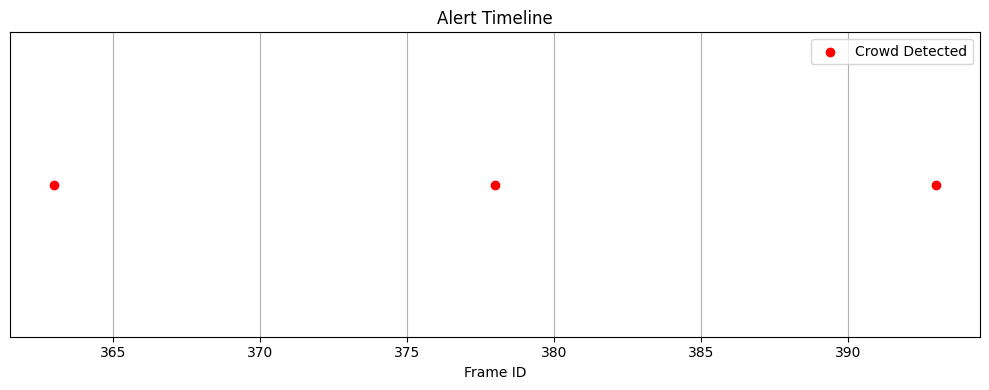

In [4]:
plt.figure(figsize=(10, 4))
plt.scatter(alert_times, [1]*len(alert_times), color='red', label='Crowd Detected')
plt.title("Alert Timeline")
plt.xlabel("Frame ID")
plt.yticks([])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(timeline_plot_path)
plt.show()

## How I did it – Step-by-step:


1. Loaded the video using OpenCV from the given local path.

2. Loaded the YOLOv5 model to detect objects, especially focusing on people.

3. Processed every 3rd frame from the video to simulate a real-time stream.

4. For each processed frame:

- Ran object detection using YOLOv5.

- Counted how many people (label == "person") were detected.

- Saved this count in a rolling window of the last 5 frames.

5. If 3 or more people appeared in 5 consecutive frames, triggered an alert:

- Captured the frame number and timestamp.

- Logged the alert in a list.

6. After processing the video:

- Saved all alert data in a .json file.

- Counted the total number of alerts.

7. Created a timeline scatter plot:

- Each red dot shows a frame where a crowd was detected.

8. Saved all results:

- Alert log in .json

- Timeline chart in .png